# Technical Test in Python

In [1]:
# Importation des librairies
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import pandas as pd


## 1. Chargement des données

In [2]:
# Chargement des données

data = pd.read_csv("../Data/telco.csv")
data.shape

(1000, 23)

In [3]:
data.describe()

,NbMoisService,Age,Adresse,Revenu,NbAnneesEmployeur,TailleFoyer
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.526000,41.684000,11.551000,77.535000,10.987000,2.331000
std,21.359812,12.558816,10.086681,107.044165,10.082087,1.435793
min,1.000000,18.000000,0.000000,9.000000,0.000000,1.000000
25%,17.000000,32.000000,3.000000,29.000000,3.000000,1.000000
50%,34.000000,40.000000,9.000000,47.000000,8.000000,2.000000
75%,54.000000,51.000000,18.000000,83.000000,17.000000,3.000000
max,72.000000,77.000000,55.000000,1668.000000,47.000000,8.000000


In [4]:
data.columns

Index(['Region', 'NbMoisService', 'Age', 'StatutMarital', 'Adresse', 'Revenu',
       'education', 'NbAnneesEmployeur', 'Retraite', 'Sexe', 'TailleFoyer',
       'ServiceNumVert', 'LocMateriel', 'ServiceCarteAppel', 'ServiceSansFil',
       'Internet', 'AffichageNumAppel', 'DoubleAppel', 'TransfertAppel',
       'ConfTel', 'PaieElectronique', 'CatClient', 'Churn'],
      dtype='object')

In [5]:
data.head()

,Region,NbMoisService,Age,StatutMarital,Adresse,Revenu,education,NbAnneesEmployeur,Retraite,Sexe,...,ServiceCarteAppel,ServiceSansFil,Internet,AffichageNumAppel,DoubleAppel,TransfertAppel,ConfTel,PaieElectronique,CatClient,Churn
0,Zone 2,13,44,Marie(e),9,64,Bac +2/3,5,Non,Homme,...,Oui,Non,Aucun,Non,Non,Oui,Non,Non,Service basic,Oui
1,Zone 3,11,33,Marie(e),7,136,Bac +4/5,5,Non,Homme,...,Oui,Oui,Aucun,Oui,Oui,Oui,Oui,Non,Service Total,Oui
2,Zone 3,68,52,Marie(e),24,116,Inf au bac,29,Non,Femme,...,Oui,Non,Aucun,Oui,Oui,Non,Oui,Non,Service plus,Non
3,Zone 2,33,33,Non marie(e),12,33,Niveau Bac,0,Non,Femme,...,Non,Non,Aucun,Non,Non,Non,Non,Non,Service basic,Oui
4,Zone 2,23,30,Marie(e),9,30,Inf au bac,2,Non,Homme,...,Non,Non,Aucun,Oui,Non,Oui,Oui,Non,Service plus,Non


In [6]:
data.dtypes

Region               object
NbMoisService         int64
Age                   int64
StatutMarital        object
Adresse               int64
Revenu                int64
education            object
NbAnneesEmployeur     int64
Retraite             object
Sexe                 object
TailleFoyer           int64
ServiceNumVert       object
LocMateriel          object
ServiceCarteAppel    object
ServiceSansFil       object
Internet             object
AffichageNumAppel    object
DoubleAppel          object
TransfertAppel       object
ConfTel              object
PaieElectronique     object
CatClient            object
Churn                object
dtype: object

In [7]:
X = data.drop(columns=["Churn"])
y = data["Churn"]

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

column_transformer = ColumnTransformer(
    [('oh_enc', OneHotEncoder(sparse=False), [0, 3, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])],# the column numbers I want to apply this to
    remainder='passthrough'# permet de ne pas toucher aux autres colonnes
)

X_prepared = column_transformer.fit_transform(X) 
print(X_prepared)
print(X_prepared.shape)

label_transformer = LabelBinarizer()

y_prepared = label_transformer.fit_transform(y)
print(y_prepared)
print(y_prepared.shape)

[[  0.   1.   0. ...  64.   5.   2.]
 [  0.   0.   1. ... 136.   5.   6.]
 [  0.   0.   1. ... 116.  29.   2.]
 ...
 [  0.   0.   1. ... 944.  33.   1.]
 [  0.   0.   1. ...  87.  22.   1.]
 [  0.   0.   1. ...  39.   3.   3.]]
(1000, 44)
[[1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 

## 2. Split échantillon d'apprentissage et de test

In [9]:
from sklearn.model_selection import train_test_split



X_training, X_testing, y_training, y_testing = train_test_split(X_prepared, y_prepared, test_size=0.3, random_state=100)

print(X_training.shape)
print(X_testing.shape)
print(y_training.shape)
print(y_testing.shape)

(700, 44)
(300, 44)
(700, 1)
(300, 1)


In [10]:
print(type(X_training))

<class 'numpy.ndarray'>


## 3. Statistiques Descriptives

## 4. Machine Learning

### a) Régression Logistique

In [11]:
from sklearn.linear_model import LogisticRegression

model_glm = LogisticRegression(solver="liblinear")

model_glm.fit(X_training, y_training.ravel())

print(y_training.ravel().shape)

(700,)


In [12]:
predictions_glm = model_glm.predict_proba(X_testing)[:,1]

In [13]:
predictions_glm.shape

(300,)

### b) Forêts Aléatoires

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer
import time

customized_scorer = make_scorer(roc_auc_score)

params  = {"criterion":["gini", "entropy"],
           "max_depth": np.arange(10, 30),
           "max_features": np.arange(15, 30),
           "class_weight": [None, "balanced"]
          }

grid_search = GridSearchCV(estimator = RandomForestClassifier(random_state = 123, 
                                                              n_estimators = 100), 
                           param_grid = params, 
                           cv = 5, 
                           scoring = customized_scorer,
                           iid=True,
                           n_jobs = 4)

tic = time.time()

grid_search.fit(X_training, y_training.ravel())

tac = time.time()

print("The model has taken " + str(round(tac-tic, 1)) + " seconds to run through cross-validation")

grid_search.best_params_

The model has taken 607.6 seconds to run through cross-validation


{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 22}

In [23]:
predictions_rf = grid_search.predict_proba(X_testing)[:,1]

In [24]:
predictions_rf.shape

(300,)

## 5) Benchmark de la performance prédictive

In [25]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
                  
    
auc_models = [roc_auc_score(y_testing, predictions_glm),
              roc_auc_score(y_testing, predictions_rf)]
                            
models = ["Logistic Regression", "Random Forest"]

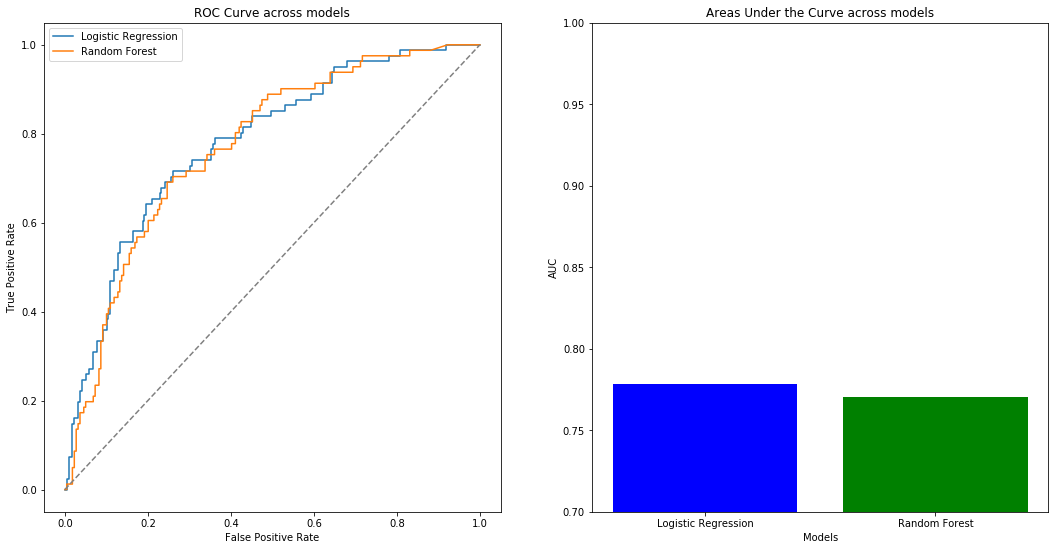

In [26]:
plt.figure(figsize=(18,9))

### Courbe ROC
plt.subplot(121)
fpr, tpr, _ = roc_curve(y_testing, predictions_glm)
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_testing, predictions_rf)
plt.plot(fpr, tpr)

plt.legend(models)
plt.plot([0, 1], color = "grey", linestyle = "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve across models")

### AUC
plt.subplot(122)
plt.bar(range(2), auc_models, color = ["blue", "green"])
plt.xticks(range(2), models)
plt.ylim([0.7, 1])
plt.xlabel("Models")
plt.ylabel("AUC")
plt.title("Areas Under the Curve across models")

plt.show()

In [27]:
print(auc_models)

[0.778116015558938, 0.7704211060375443]
